Q3:

Kuwahara filter : A non-linear smoothing filter called the Kuwahara filter keeps sharp edges in an image while lowering noise. Each pixel's local neighborhood is divided into four overlapping sub-regions, and the mean and variance of each sub-region are determined. The mean of the sub-region with the smallest variance is then used to replace the central pixel. By using this method, the filter may smooth out noise in homogeneous areas while maintaining crucial information like edges.

Region Division: The filter creates four overlapping sub-regions for each pixel in a window, usually 5x5 or 7x7.
Mean and Variance: For each of the four regions, the filter calculates the mean and variance of the pixel intensities.
Choose Region: Because it is thought to be the most homogeneous, the region with the least variance is chosen.
Replace Pixel: The chosen region's mean intensity value is used to replace the pixel.

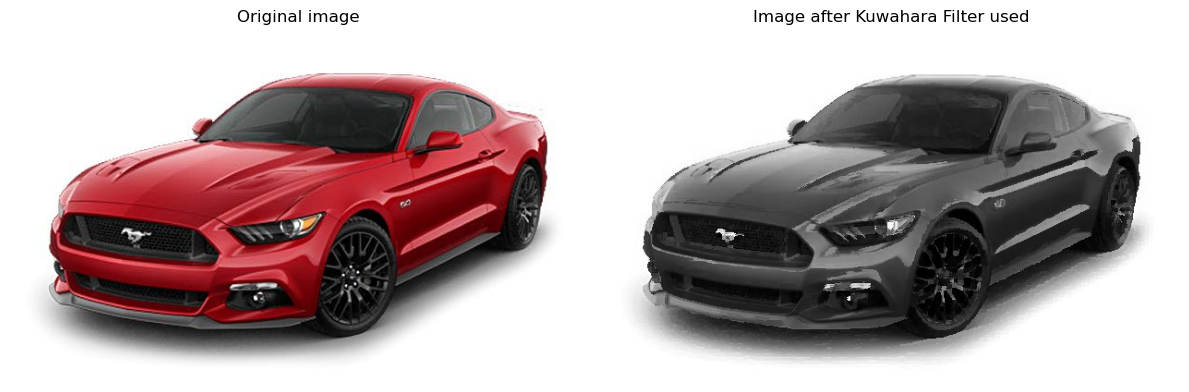

In [2]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

def k_filter(i, ksize=5):
    # Converting image to float
    i = i.astype(np.float32)
    pad_size = ksize // 2
    padded_i= np.pad(i, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')

    output_i = np.zeros_like(i)

    for y in range(i.shape[0]):
        for x in range(i.shape[1]):
            region = padded_i[y:y + ksize, x:x + ksize]
            q1 = region[:ksize//2, :ksize//2]
            q2 = region[:ksize//2, ksize//2:]
            q3 = region[ksize//2:, :ksize//2]
            q4 = region[ksize//2:, ksize//2:]

            # Calculating mean and variance for each quadrant
            means = [np.mean(q) for q in [q1, q2, q3, q4]]
            variances = [np.var(q) for q in [q1, q2, q3, q4]]

            # Choosing smallest variance of the quadrant 
            min_variance_index = np.argmin(variances)
            output_i[y, x] = means[min_variance_index]

    return np.clip(output_i, 0, 255).astype(np.uint8)

# Loading the image
image_path = 'ford.jpg'  
i = cv2.imread(image_path)

# Apply the Kuwahara filter
kuwahara_result = k_filter(i)

# Displaying the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(kuwahara_result, cv2.COLOR_BGR2RGB))
plt.title('Image after Kuwahara Filter used')
plt.axis('off')

plt.tight_layout()
plt.show()
